In [1]:
import matplotlib.pyplot as plt # plotting
import numpy as np              # working with number arrays etc.
from netCDF4 import Dataset     # reading netcdf files
import pandas as pd  
import seaborn as sns

pathles="/Users/amrapallig/run/cvmix_analysis/les/"
path="/Users/amrapallig/Desktop/cvmix/adc/convection/"

In [2]:

def plume_les(w3,w2,wt,ws):
    sw=w3/(w2**(3/2))
    sigma=0.5+sw/(2*np.sqrt(4+sw**2))
    wumd=np.sqrt(w2/(sigma*(1-sigma)))
    mc=sigma*(1-sigma)*wumd
    tumd=wt/mc
    sumd=ws/mc
    
    return sigma,mc,wumd, tumd, sumd, sw
  

In [3]:
t=96

les= Dataset(pathles+"T1S15.nc", mode='r')
fh=Dataset(path+'output.0001-01-01_00.00_t1s15_1m_test2_dtp5.nc', mode='r')
mf= Dataset(path+'adcTurbulenceArrays_t1s15_1m_test2_dtp5.nc', mode='r')  

zm_les=les.variables['zm'][:]
sigma_les, mc_les,wumd_les, tumd_les, sumd_les,sw_les=plume_les(les.variables['w3'][t,:], les.variables['w2'][t,:],les.variables['wt'][t,:],les.variables['ws'][t,:])

## ADC
sigma_adc=mf.variables["areaFraction"][t,0,:]; mc_adc=mf.variables["Mc"][t,0,:];wumd_adc=mf.variables["wumd"][t,0,:];
tumd_adc=mf.variables["tumd"][t,0,:]; sumd_adc=mf.variables["sumd"][t,0,:];zm_adc=fh.variables["zTop"][t,0,:];


In [4]:
#mf.variables.keys()

In [5]:
mc1=mf.variables["areaFraction"][t,0,:-1]*(1-mf.variables["areaFraction"][t,0,:-1])*mf.variables["wumd"][t,0,:-1]
tumd1=(mf.variables["wt"][t,0,:-1]+mf.variables["wt_spsD"][t,0,:-1])/mc1


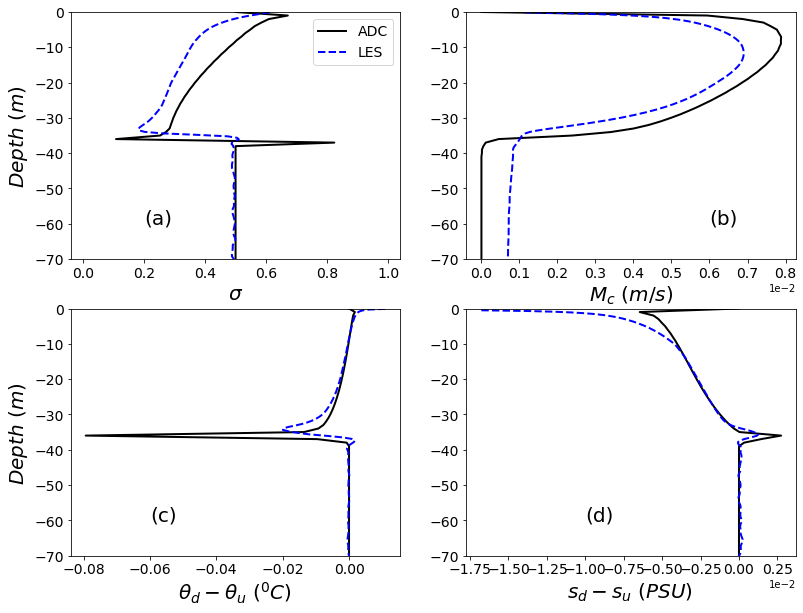

In [7]:
fig = plt.figure(figsize=(13,10))
t=96
d=70
plt.subplot(221)

plt.plot(sigma_adc[:-1],zm_adc,'k',linewidth=2)
plt.plot(sigma_les,zm_les,'--b',linewidth=2)
plt.ylim(-d,0)
plt.xlabel('$\sigma$ ', fontsize=20)
plt.ylabel('$Depth$ $(m)$ ', fontsize=20)
plt.text(0.2,-60, "(a)", fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(["ADC","LES"], fontsize=14)


plt.subplot(222)
plt.plot(mc_adc[:-1],zm_adc,'k',linewidth=2)
plt.plot(mc_les,zm_les,'--b',linewidth=2)
plt.ylim(-d,0)
plt.text(0.006,-60, "(b)", fontsize=20)
plt.xlabel('$M_c$ $(m/s)$', fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ticklabel_format(axis="x", style="sci", scilimits=(-2,-2))


plt.subplot(223)

plt.plot(tumd_adc[:-1],zm_adc,'k',linewidth=2)
plt.plot(tumd_les,zm_les,'--b',linewidth=2)
plt.ylim(-d,0)
plt.xlabel('$\\theta_d-\\theta_u$ $(^0C)$ ', fontsize=20)
plt.text(-0.06,-60, "(c)", fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('$Depth$ $(m)$ ', fontsize=20)


plt.subplot(224)
plt.plot(sumd_adc[:-1],zm_adc,'k',linewidth=2)
plt.plot(sumd_les[2:],zm_les[2:],'--b',linewidth=2)
plt.ylim(-d,0)
plt.xlabel('$s_d-s_u$ $(PSU)$ ', fontsize=20)
plt.text(-0.01,-60, "(d)", fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ticklabel_format(axis="x", style="sci", scilimits=(-2,-2))


In [7]:
#### moments:
t=96

les= Dataset(pathles+"T1S15.nc", mode='r')

sigma, mc,wumd, tumd, sumd,sw=plume_les(les.variables['w3'][t,:], les.variables['w2'][t,:],les.variables['wt'][t,:],les.variables['ws'][t,:])

w3=les.variables['w3'][t,:]
w2=les.variables['w2'][t,:]
wt=les.variables['wt'][t,:]
ws=les.variables['ws'][t,:]
zm=les.variables['zm'][:]
w4=les.variables['w4'][t,:]

In [13]:
w2_mf=sigma*(1-sigma)*wumd**2
w3_mf=-sigma*(1-sigma)*(1-2*sigma)*wumd**3
wt_mf=sigma*(1-sigma)*wumd*tumd
ws_mf=sigma*(1-sigma)*wumd*sumd
w4_mf=((1-3*sigma+3*sigma**2)/(sigma*(1-sigma)))*w2_mf**2

(array([-70., -60., -50., -40., -30., -20., -10.,   0.,  10.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

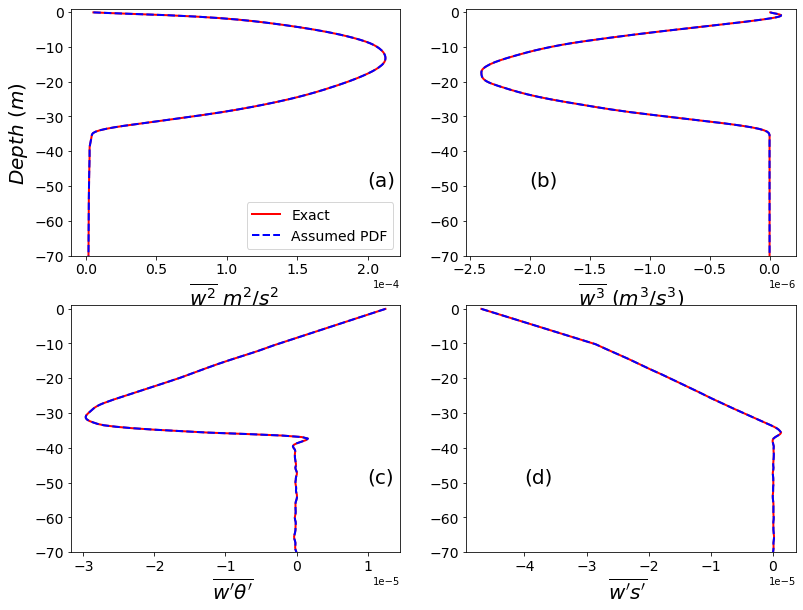

In [14]:
fig = plt.figure(figsize=(13,10))
t=96
d=70
plt.subplot(221)

plt.plot(w2,zm_les,'r',linewidth=2)
plt.plot(w2_mf,zm_les,'--b',linewidth=2)
plt.ylim(-d,1)
plt.xlabel('$\overline{w^2}$ $m^2/s^2$ ', fontsize=20)
plt.ylabel('$Depth$ $(m)$ ', fontsize=20)
plt.text(0.0002,-50, "(a)", fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(["Exact","Assumed PDF"], fontsize=14,loc=4)
plt.ticklabel_format(axis="x", style="sci", scilimits=(-4,-4))

plt.subplot(222)
plt.plot(w3,zm_les,'r',linewidth=2)
plt.plot(w3_mf,zm_les,'--b',linewidth=2)
plt.ylim(-d,1)
plt.text(-2e-6,-50, "(b)", fontsize=20)
plt.xlabel('$\overline{w^3}$ $(m^3/s^3)$', fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ticklabel_format(axis="x", style="sci", scilimits=(-6,-6))


plt.subplot(223)

plt.plot(wt,zm_les,'r',linewidth=2)
plt.plot(wt_mf,zm_les,'--b',linewidth=2)
plt.ylim(-d,1)
plt.xlabel('$\overline{w^\prime\\theta^\prime}$  ', fontsize=20)
plt.text(1e-5,-50, "(c)", fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.subplot(224)

plt.plot(ws,zm_les,'r',linewidth=2)
plt.plot(ws_mf,zm_les,'--b',linewidth=2)
plt.ylim(-d,1)
plt.xlabel('$\overline{w^\prime s^\prime}$  ', fontsize=20)
plt.text(-4e-5,-50, "(d)", fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

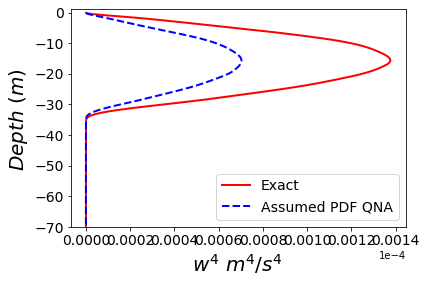

In [16]:
plt.plot(w4,zm_les,'r',linewidth=2)
plt.plot(w4_mf,zm_les,'--b',linewidth=2)
plt.ylim(-d,1)
plt.xlabel('$w^4$ $m^4/s^4$ ', fontsize=20)
plt.ylabel('$Depth$ $(m)$ ', fontsize=20)
#plt.text(0.0002,-50, "(a)", fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(["Exact","Assumed PDF QNA"], fontsize=14,loc=4)
plt.ticklabel_format(axis="x", style="sci", scilimits=(-4,-4))